In [1]:
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.rc("font", size=14)


import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [2]:
data=pd.read_excel('Data_Set.xlsx')
data.shape

(5000, 130)

In [3]:
data = data.drop_duplicates()
data2 = data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [5]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [6]:
missing_df = pd.DataFrame(data.isnull().sum()).reset_index()
missing_df.columns = ["ColumnName", "MissingCount"]


missing_df["Percent_Missing"] = round(missing_df["MissingCount"]/data.shape[0],3) * 100

missing_df.sort_values(by = "MissingCount", ascending=False)

,ColumnName,MissingCount,Percent_Missing
104,lnwiremon,3656,73.1
106,lnwireten,3656,73.1
94,lnequipmon,3296,65.9
96,lnequipten,3296,65.9
91,lntollten,2622,52.4
89,lntollmon,2622,52.4
101,lncardten,1422,28.4
99,lncardmon,1419,28.4
86,lnlongten,3,0.1
85,longten,3,0.1


In [7]:
drop_list = ["custid","lnwiremon", "lnwireten", "lnequipten", "lnequipmon", "lntollmon", "lntollten","lncardten", "lncardmon"]
data.drop(drop_list, axis = 1, inplace = True)

In [8]:
# Creating categorical features
cat = ["region", "townsize", "gender", "agecat", "birthmonth", "edcat", "jobcat","union","employ","empcat","retire","inccat","default","jobsat","marital","spousedcat","homeown","hometype","address","addresscat","cars","carown","cartype","carcatvalue","carbought","carbuy","commute","commutecat","commutecar","commutemotorcycle","commutecarpool","commutebus","commuterail","commutepublic","commutebike","commutewalk","commutenonmotor","telecommute","reason","polview","polparty","polcontrib","vote","card","cardtype","cardbenefit","cardfee","cardtenure","cardtenurecat","card2","card2type","card2benefit","card2fee","card2tenure","card2tenurecat","active","bfast","churn","tollfree","equip","callcard","wireless","multline","voice","pager","internet","callid","callwait","forward","confer","ebill","owntv","ownvcr","owndvd","owncd","ownpda","ownpc","ownipod","owngame", "ownfax","news", "response_01" ,"response_02", "response_03"]

# Assigning categoricl features to data
data[cat] = data[cat].astype('category')
cat_data = data[cat]
num_data = data.drop(cat,1)
num = num_data.columns
cat_var_names= cat_data.columns
num_var_names= num_data.columns

In [9]:
def to_numeric(x):
    x= pd.to_numeric(x, errors="coerce")
    return x

num_data=num_data.apply(lambda x: to_numeric(x))

In [10]:
cat_data.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [11]:
num_data.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27


In [12]:
def Missing_num(x):
    x = x.fillna(x.mean())
    return x

def Missing_cat(x):
    x = x.fillna(x.mode())
    return x

num_data=num_data.apply(lambda x: Missing_num(x))
cat_data.townsize.fillna(cat_data.townsize.mode())
cat_data.dropna(axis = 0,inplace=True)

In [13]:
print(num_var_names)
print(cat_var_names)

Index(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt',
       'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats',
       'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime',
       'cardspent', 'card2spent', 'tenure', 'longmon', 'lnlongmon', 'longten',
       'lnlongten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'cardmon',
       'cardten', 'wiremon', 'wireten', 'hourstv'],
      dtype='object')
Index(['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat',
       'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default',
       'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address',
       'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought',
       'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle',
       'commutecarpool', 'commutebus', 'commuterail', 'commutepublic',
       'commutebike', 'commutewalk',

In [14]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,47.025600,17.770338,18.000000,31.000000,47.000000,62.000000,79.000000
ed,5000.0,14.543000,3.281083,6.000000,12.000000,14.000000,17.000000,23.000000
income,5000.0,54.759600,55.377511,9.000000,24.000000,38.000000,67.000000,1073.000000
lninc,5000.0,3.699909,0.747072,2.197225,3.178054,3.637586,4.204693,6.978214
debtinc,5000.0,9.954160,6.399783,0.000000,5.100000,8.800000,13.600000,43.100000
creddebt,5000.0,1.857326,3.415732,0.000000,0.385520,0.926437,2.063820,109.072596
lncreddebt,5000.0,-0.130454,1.272931,-6.597334,-0.952498,-0.076409,0.724559,4.692014
othdebt,5000.0,3.654460,5.395172,0.000000,0.980301,2.098540,4.314780,141.459150
lnothdebt,5000.0,0.696915,1.128465,-4.092107,-0.018535,0.741242,1.462046,4.952011
spoused,5000.0,6.112800,7.743518,-1.000000,-1.000000,-1.000000,14.000000,24.000000


In [15]:
num_data['sqrt_creddebt'] = np.sqrt(num_data.creddebt)
num_data['ln_othdebt'] = np.log(num_data.othdebt + 1)
num_data['ln_cardmon'] = np.log(num_data.cardmon + 1)
num_data.drop(['creddebt','othdebt','cardmon'],axis=1,inplace=True)

Conclusion from  the above stats report.
* Outliers are present in data.
* tollmon ,equipmon,wiremon have 0 to 50th percentile as 0 

In [16]:
num_data.drop(['tollmon','equipmon','wiremon'],axis=1,inplace=True)

In [17]:
#Outlier Treatement
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

num_data=num_data.apply(lambda x: outlier_capping(x))

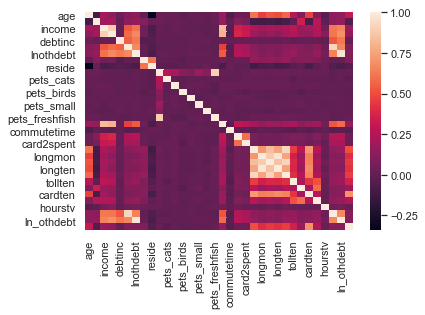

In [18]:
sns.heatmap(num_data.corr())

In [19]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=num_data.apply(lambda x: var_summary(x)).T
num_summary.to_csv('numeric_summary_report.csv')
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.272100e+04,14.544200,14.000000,3.242553,10.514149,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,21.000000
income,5000.0,0.0,2.681495e+05,53.629900,38.000000,46.567698,2168.550537,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.000100,272.010000
lninc,5000.0,0.0,1.848525e+04,3.697049,3.637586,0.738495,0.545375,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605802,5.605839
debtinc,5000.0,0.0,4.957060e+04,9.914120,8.800000,6.241691,38.958700,0.700000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,29.200000
lncreddebt,5000.0,0.0,-6.388999e+02,-0.127780,-0.076409,1.241272,1.540755,-3.401644,-3.401598,-2.291595,-1.737699,-0.952498,-0.076409,0.724559,1.458492,1.852071,2.658860,2.658885
lnothdebt,5000.0,0.0,3.491926e+03,0.698385,0.741242,1.104418,1.219739,-2.168235,-2.168229,-1.243358,-0.780244,-0.018535,0.741242,1.462046,2.087167,2.469453,3.180653,3.180727
spoused,5000.0,0.0,3.047700e+04,6.095400,-1.000000,7.709565,59.437386,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,20.000000
reside,5000.0,0.0,1.097100e+04,2.194200,2.000000,1.361491,1.853657,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000
pets,5000.0,0.0,1.524600e+04,3.049200,2.000000,3.351213,11.230625,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,8.000000,10.000000,13.000000,13.000000


In [20]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=cat_data.apply(lambda x: cat_summary(x))
cat_summary.to_csv('cat_summary_report.csv')
cat_summary

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
N,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998
NMISS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ColumnsNames,5 1026 1 1008 3 1003 2 995 4 ...,1.0 1436 2.0 1048 3.0 907 4.0 85...,"1 2516 0 2482 Name: gender, dtype: int64",4 1221 5 1195 6 1067 3 893 2 ...,September 458 May 451 June ...,2 1567 4 1110 3 1021 1 946 5 ...,2 1640 1 1388 6 687 3 619 5 ...,"0 4242 1 756 Name: union, dtype: int64",0 659 1 389 2 318 3 309 4 ...,2 1180 5 1134 1 1048 3 968 4 ...,"0 4261 1 737 Name: retire, dtype: int64",2 1797 1 1329 3 839 4 649 5 ...,"0 3827 1 1171 Name: default, dtype: int64",3 1084 2 1031 4 1016 1 975 5 ...,"0 2598 1 2400 Name: marital, dtype: int64",-1 2598 2 788 1 606 3 507 4...,"1 3146 0 1852 Name: homeown, dtype: int64",1 2263 2 1548 3 896 4 291 Name: ...,0 245 2 196 4 195 5 177 3 ...,3 1220 5 1156 4 1139 2 873 1 ...,2 1607 1 1118 3 1082 0 496 4 ...,"1 3703 0 799 -1 496 Name: carown,...",0 2287 1 2215 -1 496 Name: cartype...,1 2398 2 1267 3 837 -1 496 Na...,0 2900 1 1602 -1 496 Name: carboug...,"0 3194 1 1804 Name: carbuy, dtype: int64",1 2855 4 633 8 585 5 302 3 ...,1 2905 3 979 4 666 2 295 5 ...,"1 3395 0 1603 Name: commutecar, dtype: i...","0 4485 1 513 Name: commutemotorcycle, d...","0 3639 1 1359 Name: commutecarpool, dtyp...","0 2970 1 2028 Name: commutebus, dtype: i...","0 3626 1 1372 Name: commuterail, dtype: ...","0 4521 1 477 Name: commutepublic, dtype...","0 4381 1 617 Name: commutebike, dtype: ...","0 3079 1 1919 Name: commutewalk, dtype: ...","0 4706 1 292 Name: commutenonmotor, dty...","0 4058 1 940 Name: telecommute, dtype: ...",9 4050 1 447 2 339 4 105 3 ...,4 1732 5 892 6 843 3 659 2 ...,"0 3092 1 1906 Name: polparty, dtype: int64","0 3806 1 1192 Name: polcontrib, dtype: i...","1 2589 0 2409 Name: vote, dtype: int64",4 1343 2 1247 3 1200 1 986 5 ...,4 1260 3 1255 1 1242 2 1241 Name: ...,3 1274 4 1250 1 1245 2 1229 Name: ...,"0 4049 1 949 Name: cardfee, dtype: int64",3 246 1 228 2 220 4 192 5 ...,5 2351 2 846 3 788 4 694 1 ...,3 1383 2 1300 4 1141 1 829 5 ...,4 1319 3 1256 2 1234 1 1189 Name: ...,4 1293 3 1285 2 1216 1 1204 Name: ...,"0 4062 1 936 Name: card2fee, dtype: int64",2 304 1 276 3 259 4 249 6 ...,5 1923 2 1018 3 932 4 760 1 ...,"0 2670 1 2328 Name: active, dtype: int64","3 1873 1 1582 2 1543 Name: bfast, dty...","0 3733 1 1265 Name: churn, dtype: int64","0 2621 1 2377 Name: tollfree, dtype: int64","0 3295 1 1703 Name: equip, dtype: int64","1 3580 0 1418 Name: callcard, dtype: int64","0 3655 1 1343 Name: wireless, dtype: int64","0 2557 1 2441 Name: multline, dtype: int64","0 3484 1 1514 Name: voice, dtype: int64","0 3781 1 1217 Name: pager, dtype: int64",0 2497 1 774 3 598 4 584 2 ...,"0 2624 1 2374 Name: callid, dtype: int64","0 2605 1 2393 Name: callwait, dtype: int64","0 2596 1 2402 

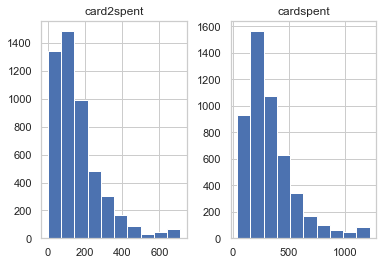

In [21]:
#Distribution of spend
num_data[['cardspent','card2spent']].hist()
plt.show()

In [22]:
#creating  new variable'totalspend which is summation of both cardspent
num_data['totalspend']= num_data.cardspent + num_data.card2spent
num_data.drop(['cardspent','card2spent'],axis=1,inplace=True)

# categorical variable analysis
 * Boxplot with Target variable
 * Anova test for variable reduction

In [23]:
data= pd.concat([num_data,cat_data],axis=1)

In [24]:
def categorical_segmentationplots(variablename):
    """Function to plot segmentation plot of target variable using cat variables"""
    data.boxplot('totalspend',by = variablename)
    plt.show()

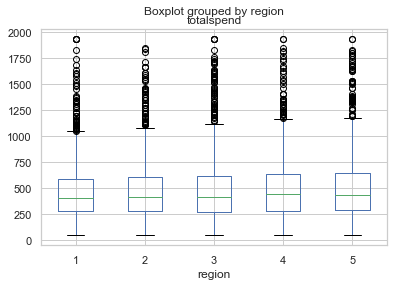

In [25]:
categorical_segmentationplots('region')

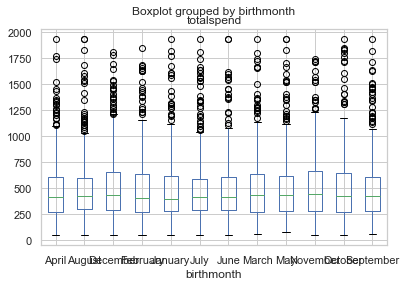

In [26]:
categorical_segmentationplots('birthmonth')

# Categorical Variable Reduction using ANOVA

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
dctpvalue = {}
cat_var_selected = []
#performing the anova test and selecting variables with p value < 0.05(5%)
for eachvar in cat_var_names:
    mod= ols('totalspend ~' + eachvar,data=data).fit()
    aov_table= sm.stats.anova_lm(mod,typ=2)
    p_value = round(aov_table['PR(>F)'][eachvar],4)
    
    if p_value < 0.05:
        dctpvalue[eachvar]= p_value
        cat_var_selected.append(eachvar)

In [29]:
#dictionary of values with p-value
dctpvalue

{'region': 0.0343,
 'gender': 0.0,
 'agecat': 0.0,
 'edcat': 0.0,
 'jobcat': 0.0,
 'employ': 0.0,
 'empcat': 0.0,
 'retire': 0.0,
 'inccat': 0.0,
 'jobsat': 0.0,
 'spousedcat': 0.0103,
 'homeown': 0.0,
 'hometype': 0.0001,
 'address': 0.0,
 'addresscat': 0.0,
 'carown': 0.0,
 'carcatvalue': 0.0,
 'commutebike': 0.0301,
 'reason': 0.0,
 'polcontrib': 0.0284,
 'vote': 0.0,
 'card': 0.0,
 'cardtenure': 0.0005,
 'cardtenurecat': 0.0,
 'card2': 0.0,
 'card2fee': 0.0265,
 'card2tenure': 0.0,
 'card2tenurecat': 0.0,
 'tollfree': 0.0,
 'equip': 0.0003,
 'callcard': 0.0399,
 'wireless': 0.0,
 'multline': 0.0006,
 'voice': 0.0167,
 'pager': 0.0001,
 'internet': 0.0,
 'callid': 0.0001,
 'callwait': 0.0,
 'forward': 0.0001,
 'confer': 0.0,
 'ebill': 0.0351,
 'owntv': 0.0,
 'ownvcr': 0.0,
 'owndvd': 0.0,
 'owncd': 0.0,
 'ownpda': 0.0,
 'ownpc': 0.0003,
 'ownipod': 0.028,
 'ownfax': 0.0,
 'news': 0.0043,
 'response_03': 0.0003}

In [30]:
#sorting the dictionary based on the values of p-value
lstitems = sorted(dctpvalue.items(),key=lambda x:x[1])

In [31]:
#Removing the last 10 columns based on the anova test

lstitems = lstitems[:len(lstitems)-5]
lstitems

[('gender', 0.0),
 ('agecat', 0.0),
 ('edcat', 0.0),
 ('jobcat', 0.0),
 ('employ', 0.0),
 ('empcat', 0.0),
 ('retire', 0.0),
 ('inccat', 0.0),
 ('jobsat', 0.0),
 ('homeown', 0.0),
 ('address', 0.0),
 ('addresscat', 0.0),
 ('carown', 0.0),
 ('carcatvalue', 0.0),
 ('reason', 0.0),
 ('vote', 0.0),
 ('card', 0.0),
 ('cardtenurecat', 0.0),
 ('card2', 0.0),
 ('card2tenure', 0.0),
 ('card2tenurecat', 0.0),
 ('tollfree', 0.0),
 ('wireless', 0.0),
 ('internet', 0.0),
 ('callwait', 0.0),
 ('confer', 0.0),
 ('owntv', 0.0),
 ('ownvcr', 0.0),
 ('owndvd', 0.0),
 ('owncd', 0.0),
 ('ownpda', 0.0),
 ('ownfax', 0.0),
 ('hometype', 0.0001),
 ('pager', 0.0001),
 ('callid', 0.0001),
 ('forward', 0.0001),
 ('equip', 0.0003),
 ('ownpc', 0.0003),
 ('response_03', 0.0003),
 ('cardtenure', 0.0005),
 ('multline', 0.0006),
 ('news', 0.0043),
 ('spousedcat', 0.0103),
 ('voice', 0.0167),
 ('card2fee', 0.0265),
 ('ownipod', 0.028)]

In [32]:
cat_var_selected = [x for x,y in lstitems]

In [33]:
print('Number of categorical variables before variable selection method :' + str(len(cat_var_names)))
print('Number of categorical variables after variable selection method :' + str(len(cat_var_selected)))

Number of categorical variables before variable selection method :84
Number of categorical variables after variable selection method :46


In [34]:
cat_var_selected.append('commutebike')
cat_var_selected.append('ownipod')
cat_var_selected.append('voice')
cat_var_selected.append('callcard')
cat_var_selected.append('card2fee')

In [35]:
cat_data = cat_data[cat_var_selected]

In [36]:
from sklearn.preprocessing import LabelEncoder
# label encoder for flag
l_en = LabelEncoder()
cat_data.apply(LabelEncoder().fit_transform)

,gender,agecat,edcat,jobcat,employ,empcat,retire,inccat,jobsat,homeown,address,addresscat,carown,carcatvalue,reason,vote,card,cardtenurecat,card2,card2tenure,card2tenurecat,tollfree,wireless,internet,callwait,confer,owntv,ownvcr,owndvd,owncd,ownpda,ownfax,hometype,pager,callid,forward,equip,ownpc,response_03,cardtenure,multline,news,spousedcat,voice,card2fee,ownipod,commutebike,ownipod,voice,callcard,card2fee
0,1,0,2,0,0,0,0,1,0,0,0,0,2,1,4,1,2,1,4,3,1,1,0,0,1,1,1,1,1,0,0,0,1,1,0,1,1,0,0,2,1,0,0,1,0,1,0,1,1,1,0
1,0,0,3,1,0,0,0,0,0,1,2,0,2,1,4,0,1,1,3,4,1,0,1,4,0,0,1,1,1,1,1,1,2,1,1,1,1,1,0,4,1,1,0,1,0,1,1,1,1,1,0
2,1,4,1,1,16,4,0,1,3,1,30,4,2,1,1,0,1,4,3,25,4,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,35,1,1,2,0,0,0,0,0,0,1,0
3,0,0,2,1,0,0,0,0,1,1,3,1,2,1,4,0,1,1,2,5,1,0,0,2,0,0,1,1,1,1,0,0,2,0,0,0,0,1,0,5,1,1,4,0,0,1,0,1,0,1,0
4,0,1,2,1,1,0,0,0,0,0,3,1,1,1,4,0,3,2,0,9,2,1,1,3,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,8,0,0,2,1,0,0,0,0,1,1,0
5,0,3,3,2,22,4,0,3,1,1,31,4,0,0,4,0,1,4,2,9,2,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,18,0,0,0,0,1,0,0,0,0,1,1
6,1,3,1,0,10,2,0,3,1,0,21,3,2,2,4,0,4,1,1,2,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0,1,0,3,0,0,0,0,0,1,1,1,0,0,0
7,1,2,2,0,11,3,0,3,4,1,20,3,2,3,1,1,0,4,2,20,4,1,0,0,1,1,1,1,1,1,0,0,2,0,1,1,0,0,0,25,1,1,3,0,0,0,0,0,0,1,0
8,1,4,1,0,15,3,1,0,1,1,21,3,2,1,4,1,2,4,1,17,4,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,26,1,0,0,0,0,0,0,0,0,1,0
9,0,2,0,5,19,4,0,3,3,1,19,3,2,3,4,1,4,1,1,2,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [37]:
final_data= pd.concat([num_data,cat_data],axis=1)
final_data.dropna(inplace=True)

# creation of Base Table

* merging of numeric data and categorical dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E8F70EA6A0>]],
      dtype=object)

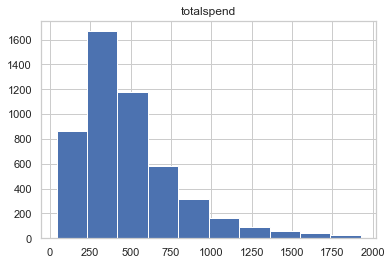

In [40]:
#checking the distribution of Target variabe

final_data[['totalspend']].hist()

* target variable is positively skewed ,so talking log transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E8F782D400>]],
      dtype=object)

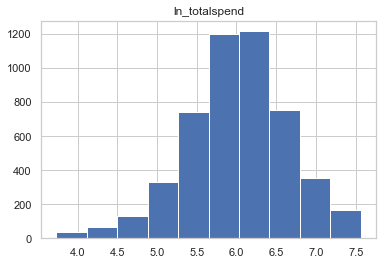

In [41]:
final_data['ln_totalspend'] = np.log(final_data.totalspend +1)
final_data.drop(['totalspend'],axis=1,inplace=True)
final_data[['ln_totalspend']].hist()

In [42]:
#exporting cleaned data
final_data.to_csv('cleaned_data.csv',index=False)